In [5]:
import os

In [6]:
os.chdir("C:\\Users\\dell\\Downloads\\dataset Folder-20210530T122954Z-001\\dataset Folder")

In [7]:
os.getcwd()

'C:\\Users\\dell\\Downloads\\dataset Folder-20210530T122954Z-001\\dataset Folder'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
advertising = pd.read_csv("Advertising.csv")
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
pd.DataFrame(advertising).isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [11]:
pd.DataFrame(advertising).isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
# check the number of features in the dataset
print(len(advertising))
print(len(advertising.columns))
# check the data type of each columns
print(advertising.dtypes)

200
5
Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


In [14]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
#Finding Correlation
# to find the relation with Dependent variable vs Independant variable
features = advertising.iloc[:,0:3].columns.tolist()
features

['Unnamed: 0', 'TV', 'Radio']

In [17]:
target_var = advertising.iloc[:,4].name
target_var

'Sales'

In [18]:
from scipy.stats import pearsonr 

In [20]:
correlations = {}
for i in features:
    data = advertising[[i, target_var]]
    x1 = data[i].values
    x2 = data[target_var].values
    key = i + "Vs" + target_var
    correlations[key] = pearsonr(x1,x2)[0]

In [21]:
correlations

{'Unnamed: 0VsSales': -0.051616252473605566,
 'TVVsSales': 0.7822244248616064,
 'RadioVsSales': 0.5762225745710552}

In [22]:
data_correlations = pd.DataFrame(correlations, index = ['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
TVVsSales,0.782224
RadioVsSales,0.576223
Unnamed: 0VsSales,-0.051616


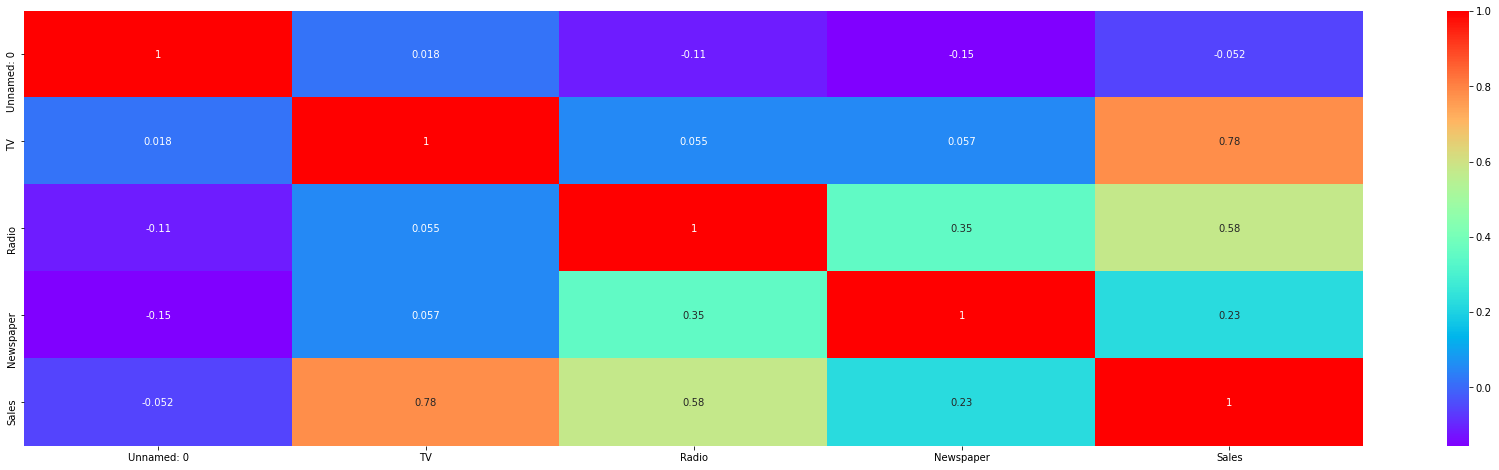

In [24]:
plt.figure(figsize=(30,8))
sns.heatmap(advertising.corr(), cmap='rainbow', annot=True)
plt.show()

In [25]:
#eda part
from scipy.stats import stats
from scipy.stats import norm, skew

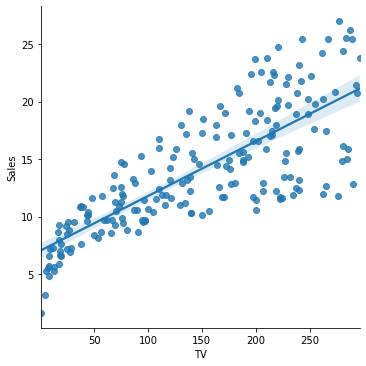

In [27]:
sns.lmplot(x='TV', y='Sales', data=advertising)

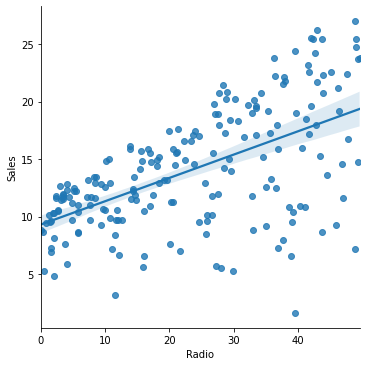

In [28]:
sns.lmplot(x='Radio', y='Sales', data=advertising)

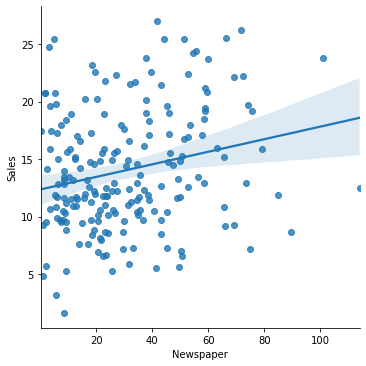

In [29]:
sns.lmplot(x='Newspaper', y='Sales', data=advertising)

In [30]:
advertising.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

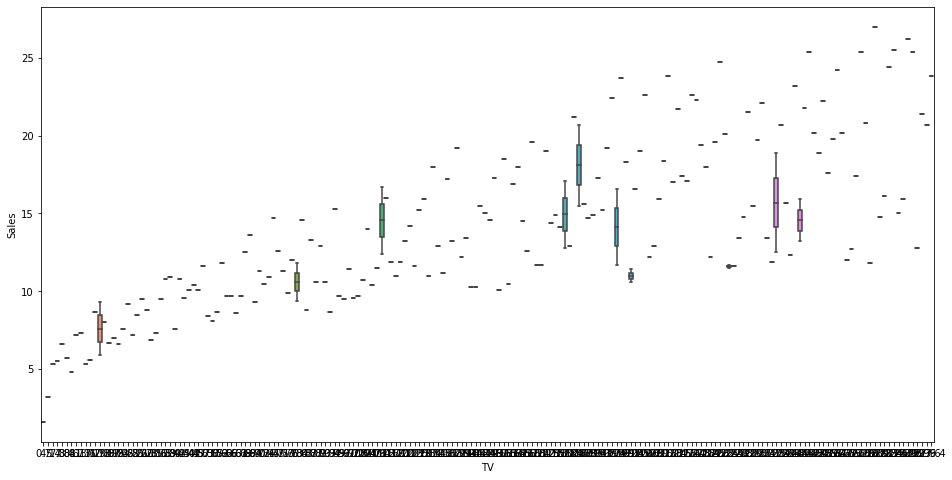

In [32]:
plt.figure(figsize = (16,8))
sns.boxplot(x='TV', y='Sales', data = advertising)
plt.show()

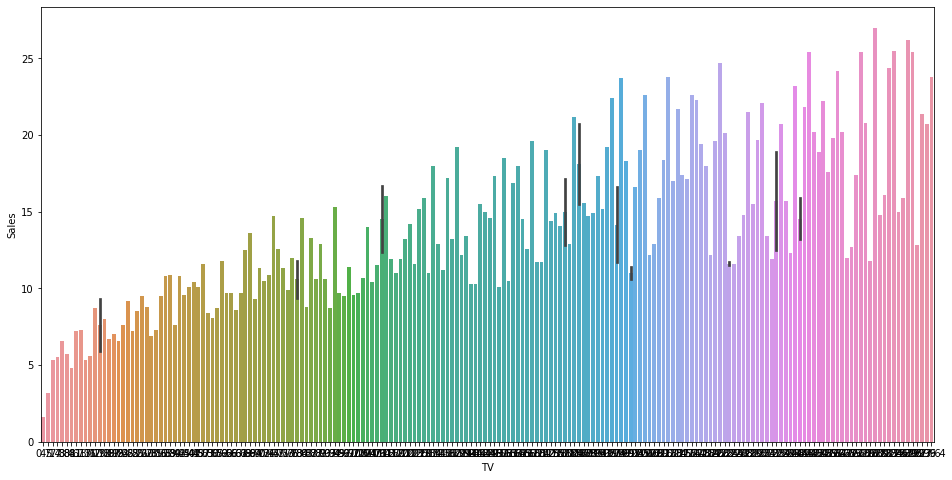

In [33]:
plt.figure(figsize = (16,8))
sns.barplot(x='TV', y='Sales', data = advertising)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

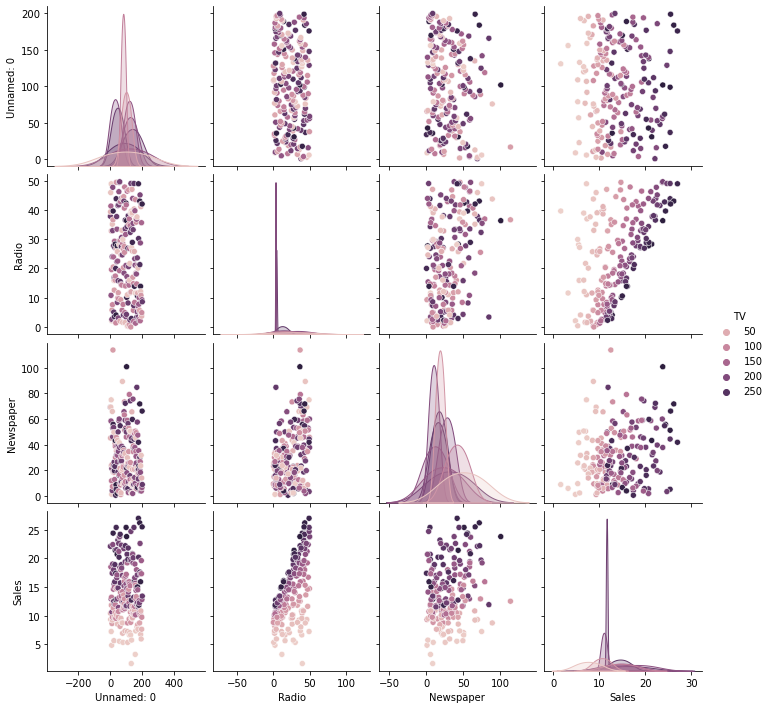

In [36]:
sns.pairplot(advertising, hue='TV')

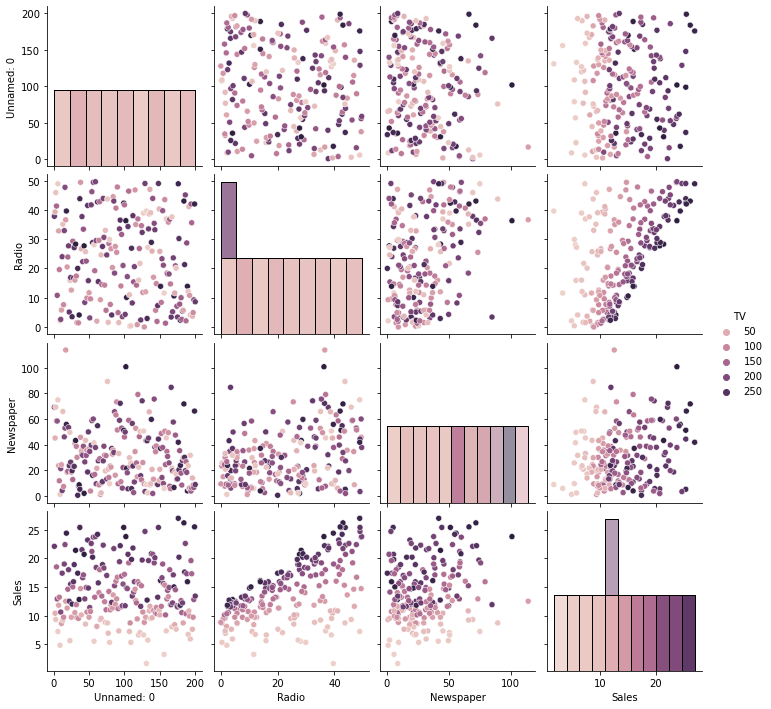

In [37]:
sns.pairplot(advertising, hue='TV', diag_kind='hist')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Profit Distribution')

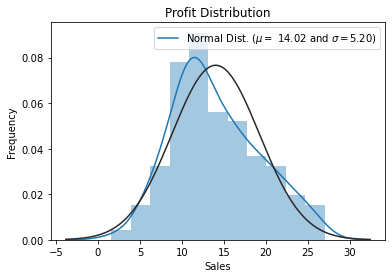

In [38]:

sns.distplot(advertising['Sales'], fit=norm);

# fitted with some parameter by using mu and sigma

(mu, sigma) = norm.fit(advertising['Sales'])

plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu, sigma)],
          loc='best')
plt.ylabel('Frequency')
plt.title("Profit Distribution")


In [43]:
x = advertising.iloc[:,0:3].values
advertising.head()
x

array([[  1. , 230.1,  37.8],
       [  2. ,  44.5,  39.3],
       [  3. ,  17.2,  45.9],
       [  4. , 151.5,  41.3],
       [  5. , 180.8,  10.8],
       [  6. ,   8.7,  48.9],
       [  7. ,  57.5,  32.8],
       [  8. , 120.2,  19.6],
       [  9. ,   8.6,   2.1],
       [ 10. , 199.8,   2.6],
       [ 11. ,  66.1,   5.8],
       [ 12. , 214.7,  24. ],
       [ 13. ,  23.8,  35.1],
       [ 14. ,  97.5,   7.6],
       [ 15. , 204.1,  32.9],
       [ 16. , 195.4,  47.7],
       [ 17. ,  67.8,  36.6],
       [ 18. , 281.4,  39.6],
       [ 19. ,  69.2,  20.5],
       [ 20. , 147.3,  23.9],
       [ 21. , 218.4,  27.7],
       [ 22. , 237.4,   5.1],
       [ 23. ,  13.2,  15.9],
       [ 24. , 228.3,  16.9],
       [ 25. ,  62.3,  12.6],
       [ 26. , 262.9,   3.5],
       [ 27. , 142.9,  29.3],
       [ 28. , 240.1,  16.7],
       [ 29. , 248.8,  27.1],
       [ 30. ,  70.6,  16. ],
       [ 31. , 292.9,  28.3],
       [ 32. , 112.9,  17.4],
       [ 33. ,  97.2,   1.5],
       [ 3

In [42]:
y = advertising.iloc[:,4].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
labelencoder = LabelEncoder()
x[:,1] = labelencoder.fit_transform(x[:,1])

In [47]:
from sklearn.compose import ColumnTransformer

In [49]:
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto',),[1])],  
                       remainder='passthrough')

# in default categories = auto
onehot_x= np.array(ct.fit_transform(x), dtype=np.str)

ValueError: setting an array element with a sequence

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=101)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [53]:
#applying each model to know what is the accuracy
#and first comes the decision tree
from sklearn.tree import DecisionTreeRegressor

In [54]:
from sklearn.metrics import explained_variance_score
from time import time
# Model Building
start = time()
decision = DecisionTreeRegressor()
decision.fit(x_train, y_train)
decc = decision.score(x_test,y_test)

# Prediction
decpredict = decision.predict(x_test)


# explained_variance_score - comparing pred vs actual
# confusion_matrix - comparing actual vs pred

# Score / Accuracy
exp_dec = explained_variance_score(decpredict, y_test)
end = time()
train_time_dec = end-start

In [55]:
exp_dec

0.9378674810224259

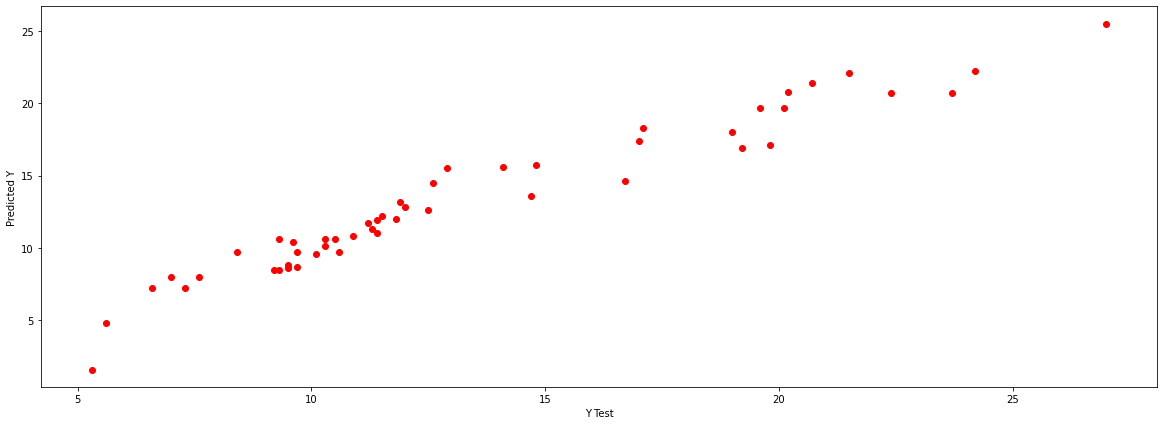

In [56]:
plt.figure(figsize=(20,7))
plt.scatter(y_test,decpredict, c = 'red')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

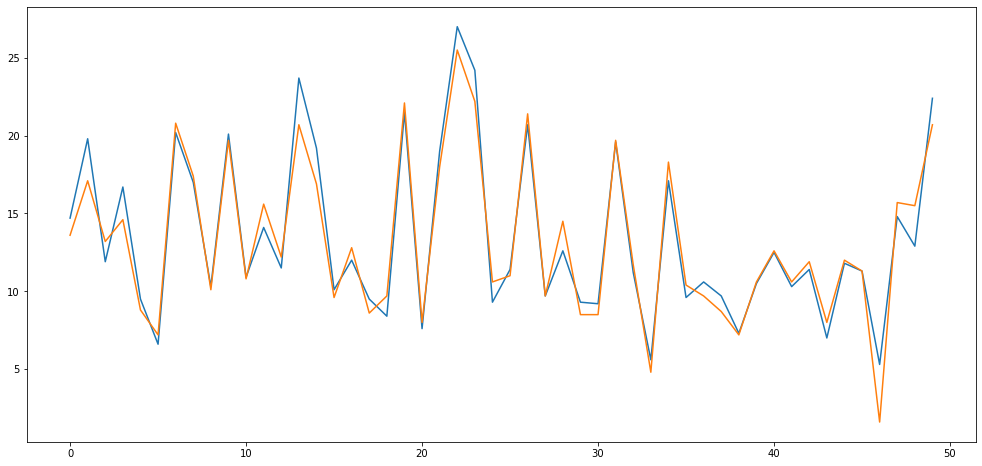

In [57]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(decpredict, label = "predict")
plt.show()

In [59]:
#random forest the best in ensemble techniques
from sklearn.ensemble import RandomForestRegressor
start = time()
rand_regr = RandomForestRegressor(n_estimators = 400, random_state=0)
rand_regr.fit(x_train, y_train)
random = rand_regr.score(x_test, y_test)
end = time()
train_test_rand = end - start
predict_rand = rand_regr.predict(x_test)
exp_rand = explained_variance_score(predict_rand , y_test)

In [60]:
exp_rand

0.97621196194814

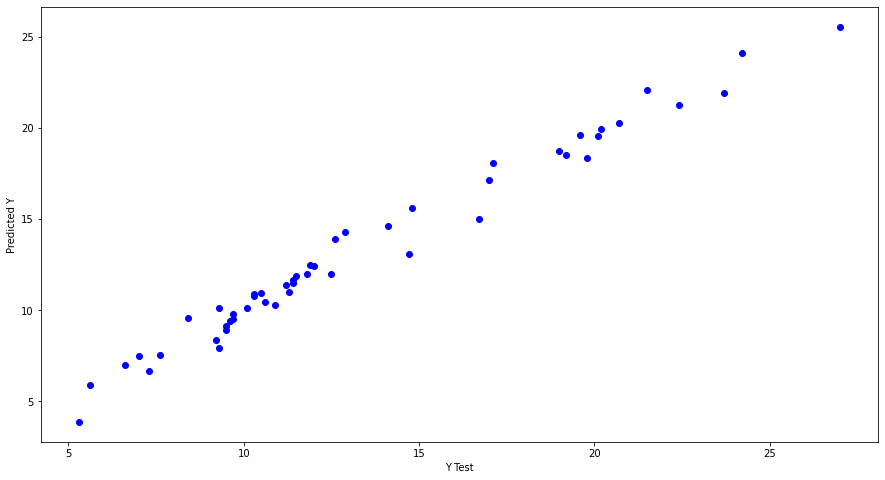

In [61]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_rand, c = 'blue')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

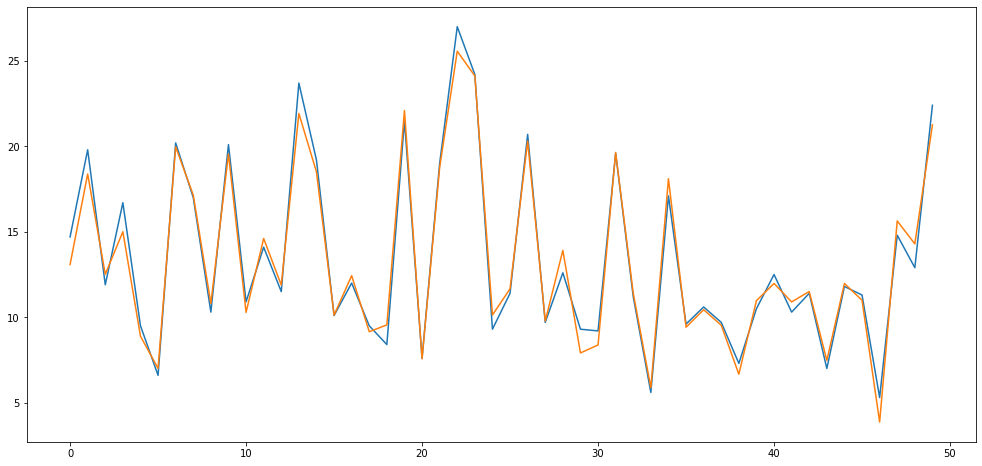

In [62]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(predict_rand, label = "predict")
plt.show()

In [63]:
#gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est = GradientBoostingRegressor(n_estimators = 400, max_depth=5, loss='ls', min_samples_split=2, learning_rate=0.1).fit(x_train, y_train)
gradient = est.score(x_test, y_test)
# Loss function - MAE, MAPE, MSE, RME

end = time()
train_test_est = end - start
predict_est = est.predict(x_test)
exp_est = explained_variance_score(predict_est, y_test)

In [64]:
exp_est

0.9773765710351656

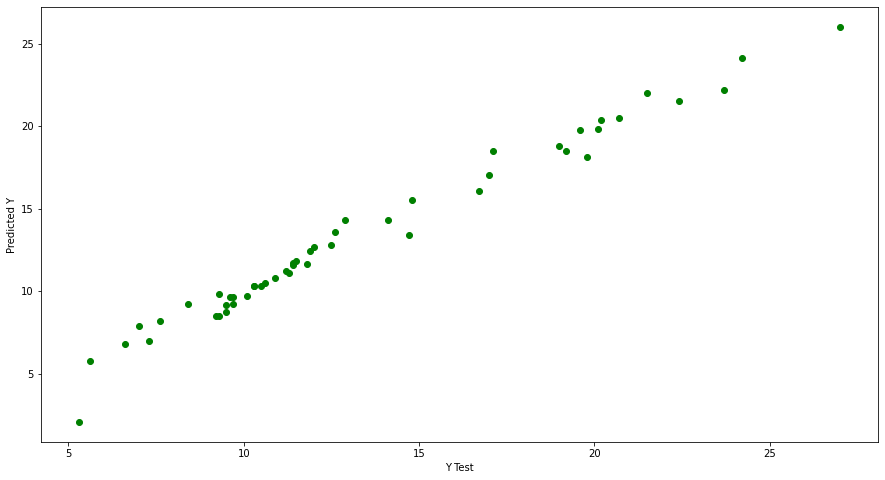

In [66]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predict_est, c = 'green')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

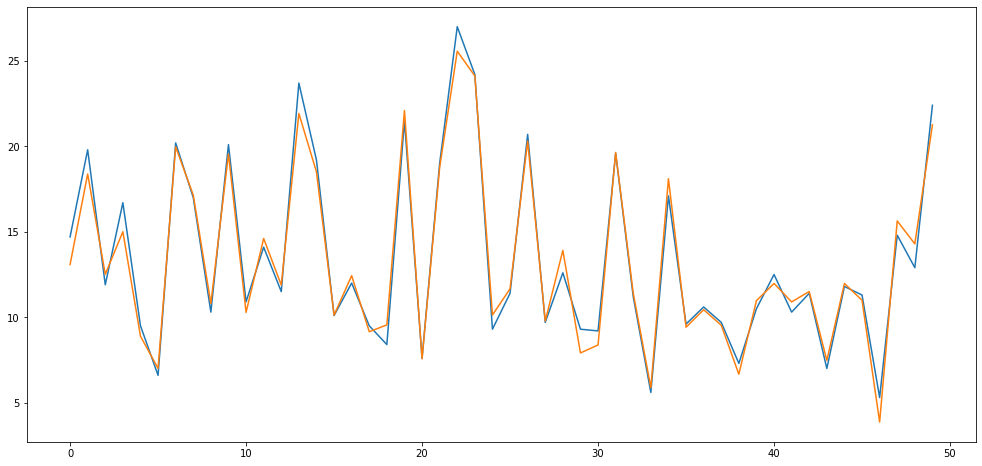

In [67]:
plt.figure(figsize=(17,8))
plt.plot(y_test, label = "Test")
plt.plot(predict_rand, label = "predict")
plt.show()

In [68]:
#ada boost
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.2, loss='exponential').fit(x_train, y_train)
adab = ada.score(x_test, y_test)
# Loss function - MAE, MAPE, MSE, RME

end = time()
train_test_ada = end - start
predict_ada = ada.predict(x_test)
exp_ada = explained_variance_score(predict_ada, y_test)

In [69]:
exp_ada

0.9284374417949749

In [70]:
#support vector Machione
from sklearn.svm import SVR
start = time()
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
end = time()
train_time_svr = end-start
svr1 = svr.score(x_test, y_test)
prediction_svr = svr.predict(x_test)
exp_svr = explained_variance_score(prediction_svr, y_test)


In [71]:
exp_svr

0.8776516912484631

In [72]:
#linear regression
from sklearn.linear_model import LinearRegression
start = time()
regressor = LinearRegression()
regressor.fit(x_train, y_train)
end = time()
train_time_linear = end-start
regressor1 = regressor.score(x_test, y_test)
prediction_linear = regressor.predict(x_test)
exp_linear = explained_variance_score(prediction_linear, y_test)

In [73]:
exp_linear

0.9089910557578413

In [74]:
#Model Comparision
#Model Comparision on the basis of Model's Accuracy Score and Explained Variance score of different models

In [75]:
model_validation = pd.DataFrame({
    'Model':['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost',
            'Support Vector Machine','Linear Regression'],
    'Score': [decc,random,gradient,adab,svr1,regressor1],
    'Variance Score': [exp_dec,exp_rand,exp_est,exp_ada,exp_svr,exp_linear]
    
    
})


model_validation.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
2,Gradiant Boosting,0.977388,0.977377
1,Random Forest,0.977380,0.976212
0,Decision Tree,0.941559,0.937867
3,AdaBoost,0.939504,0.928437
5,Linear Regression,0.921321,0.908991
4,Support Vector Machine,0.889933,0.877652


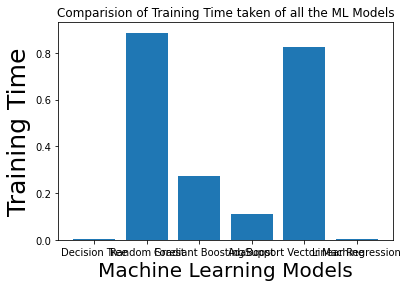

In [76]:
#Analysing training time for each model has taken
Model = ['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost',
            'Support Vector Machine','Linear Regression']
Train_time = [
    train_time_dec,
    train_test_rand,
    train_test_est,
    train_test_ada,
    train_time_svr,
    train_time_linear    
]

index = np.arange(len(Model))
plt.bar(index, Train_time)
plt.xlabel("Machine Learning Models", fontsize =20)
plt.ylabel("Training Time", fontsize = 25)
plt.xticks(index, Model, fontsize=10)
plt.title("Comparision of Training Time taken of all the ML Models")
plt.show()

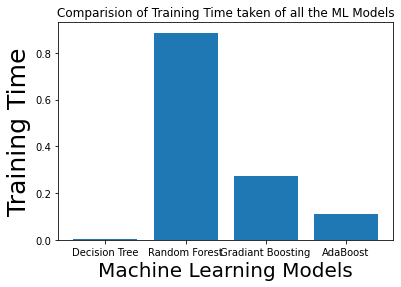

In [77]:
Model = ['Decision Tree','Random Forest','Gradiant Boosting','AdaBoost']
            
Train_time = [
    train_time_dec,
    train_test_rand,
    train_test_est,
    train_test_ada,
  
]

index = np.arange(len(Model))
plt.bar(index, Train_time)
plt.xlabel("Machine Learning Models", fontsize =20)
plt.ylabel("Training Time", fontsize = 25)
plt.xticks(index, Model, fontsize=10)
plt.title("Comparision of Training Time taken of all the ML Models")
plt.show()

In [78]:
#using k fold method to get the best out of the models
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = est, X = x_train, y=y_train, cv = 10)
accuracy

array([0.9863527 , 0.97830386, 0.97532021, 0.98443527, 0.95925187,
       0.94098496, 0.96665314, 0.97796522, 0.94703618, 0.95395697])

In [80]:
#hence k- fold and random forest are giving higest possible accuracies we will go by them as we have reached the benchmark
#enjoy...... k fold is giving us 98% and gradient boosting and random forest are giving equal but difference in points 
# are  giving 97% accuracy. thank you 